In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

![](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

- Figure
- Axes

## 1. Matplotlib

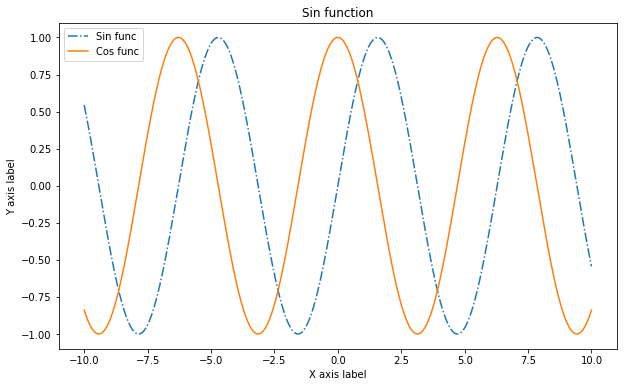

In [48]:
x = np.linspace(-10, 10, 1000)
sin = np.sin(x)
cos = np.cos(x)

plt.figure(figsize=(10, 6))
plt.plot(x, sin, label='Sin func', linestyle='-.')
plt.plot(x, cos, label='Cos func')
# plt.plot(x, sin/cos, label='Tan func')
plt.title('Sin function')
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
# plt.grid()
plt.legend(loc='upper left');
# plt.show()

In [28]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


![](https://www.iditect.com/imgs/54673909-3.jpg)

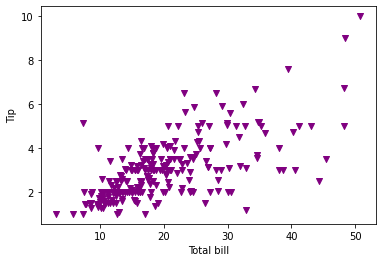

In [43]:
plt.rcParams['axes.facecolor'] = 'w'
plt.scatter(tips.total_bill, tips.tip, c='purple', marker='v')
plt.xlabel('Total bill')
# plt.f
plt.ylabel('Tip');

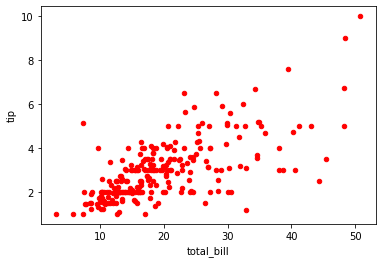

In [33]:
tips.plot(kind='scatter', x='total_bill', y='tip', c='r');

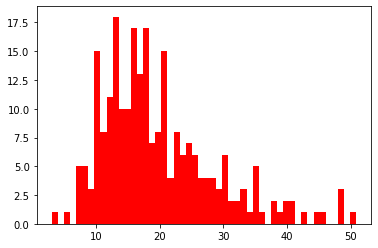

In [53]:
plt.hist(tips.total_bill, color='r', bins=50);

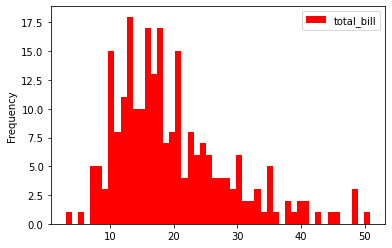

In [60]:
tips.plot(kind='hist', y='total_bill', bins=50, color='r');

In [61]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


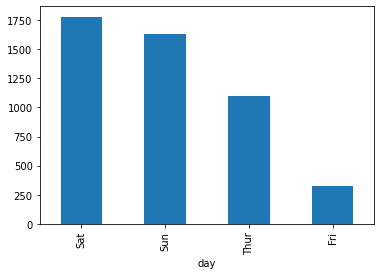

In [66]:
tips.groupby('day').total_bill.sum().sort_values(ascending=False)\
.plot(kind='bar');

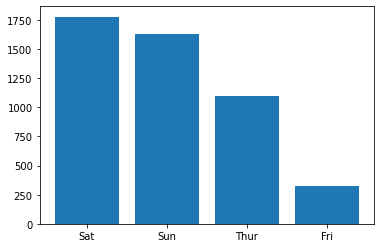

In [67]:
plt.bar(tips.groupby('day').total_bill.sum().sort_values(ascending=False).index, 
       tips.groupby('day').total_bill.sum().sort_values(ascending=False).values);

In [69]:
data = tips.groupby('day').total_bill.sum().sort_values(ascending=False)

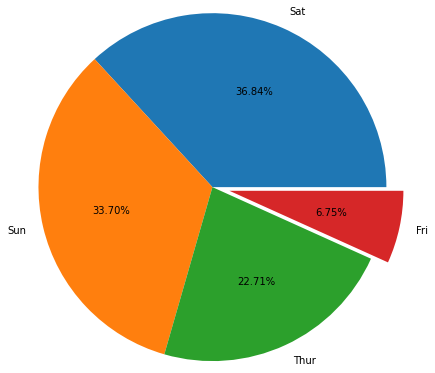

In [96]:
plt.pie(data.values, labels=data.index, autopct='%0.2f%%', 
        normalize=True, radius=2, explode = (0, 0, 0, 0.2) );

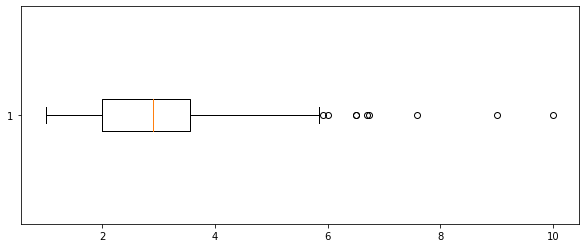

In [100]:
plt.figure(figsize=(10, 4))
plt.boxplot(tips.tip, vert=False);

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

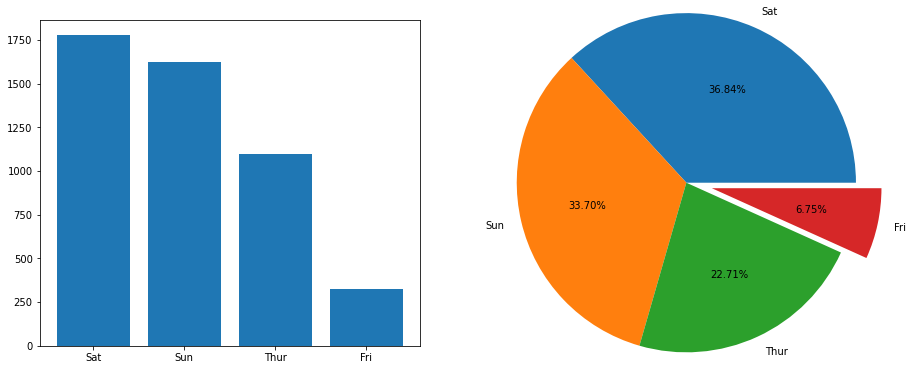

In [111]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(tips.groupby('day').total_bill.sum().sort_values(ascending=False).index, 
       tips.groupby('day').total_bill.sum().sort_values(ascending=False).values)

plt.subplot(1, 2, 2)
plt.pie(data.values, labels=data.index, autopct='%0.2f%%', 
        normalize=True, radius=1.3, explode = (0, 0, 0, 0.2) )
plt.savefig('fig.png');

In [112]:
from IPython.display import Image

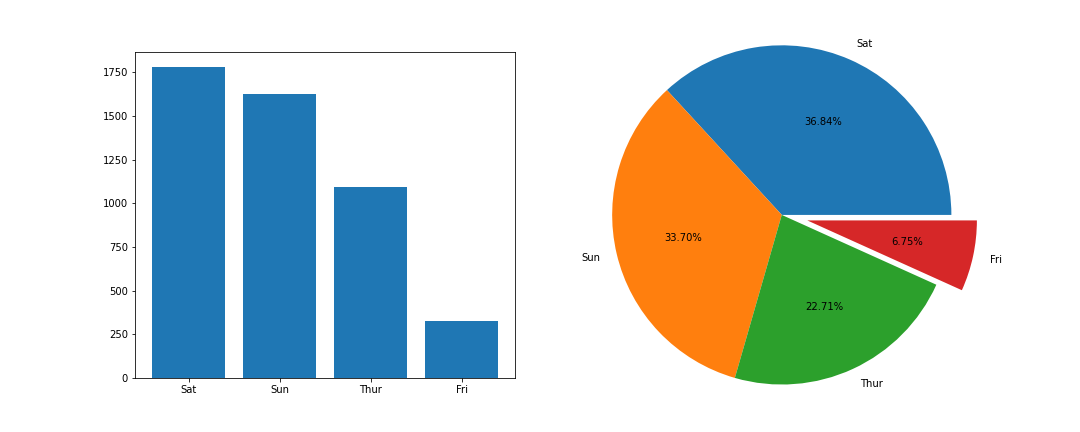

In [113]:
Image('fig.png')

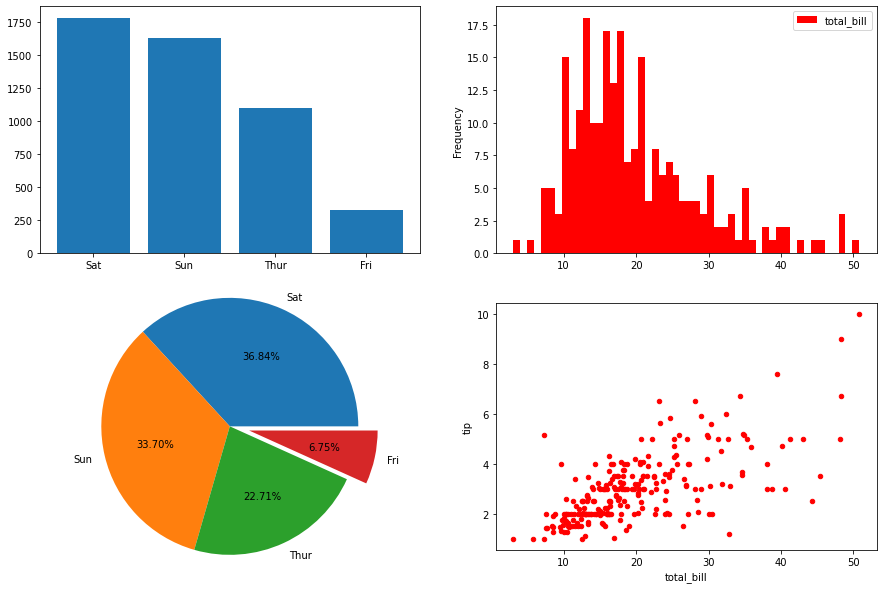

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].bar(tips.groupby('day').total_bill.sum().sort_values(ascending=False).index, 
       tips.groupby('day').total_bill.sum().sort_values(ascending=False).values)

tips.plot(kind='hist', y='total_bill', bins=50, color='r', ax=axes[0, 1])

tips.plot(kind='scatter', x='total_bill', y='tip', c='r', ax=axes[1, 1])

axes[1, 0].pie(data.values, labels=data.index, autopct='%0.2f%%', 
        normalize=True, radius=1.3, explode = (0, 0, 0, 0.2));

## 2. Seaborn

In [125]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


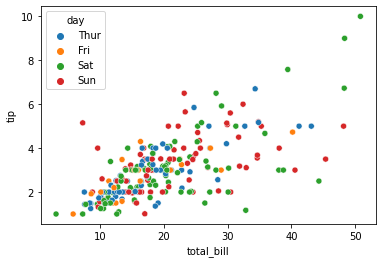

In [126]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day');

In [127]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


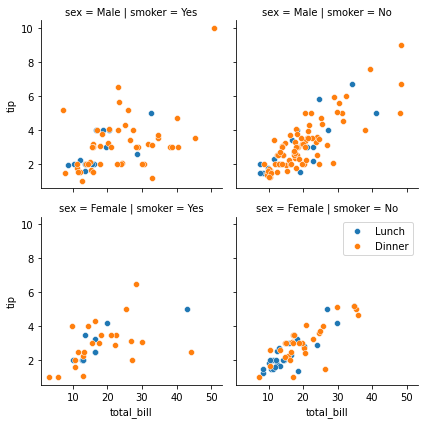

In [133]:
g = sns.FacetGrid(data=tips, col='smoker', row='sex', hue='time')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.legend();

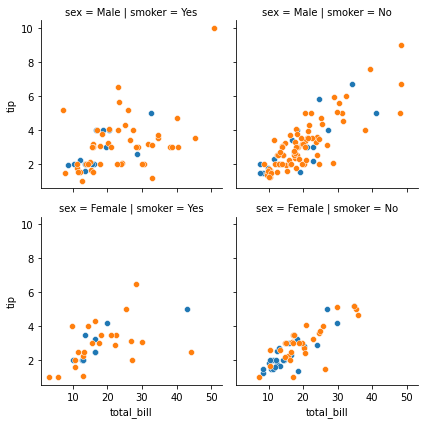

In [148]:
g = sns.FacetGrid(data=tips, col='smoker', row='sex', hue='time')
g.map_dataframe(sns.scatterplot, 'total_bill', 'tip');

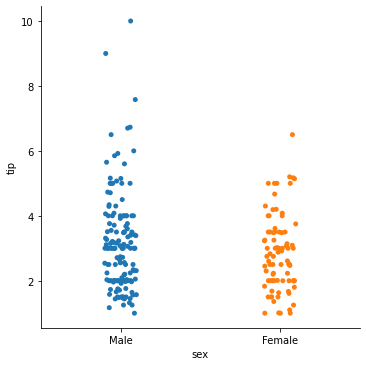

In [150]:
sns.catplot(data=tips, x='sex', y='tip', kind='strip');

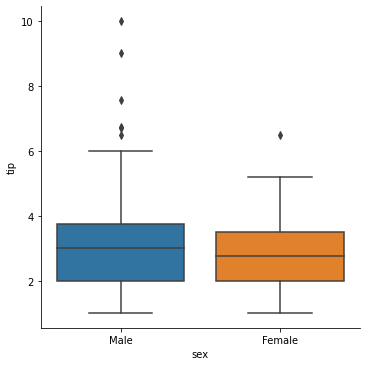

In [151]:
sns.catplot(data=tips, x='sex', y='tip', kind='box');

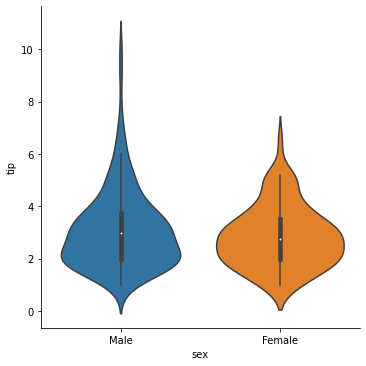

In [152]:
sns.catplot(data=tips, x='sex', y='tip', kind='violin');

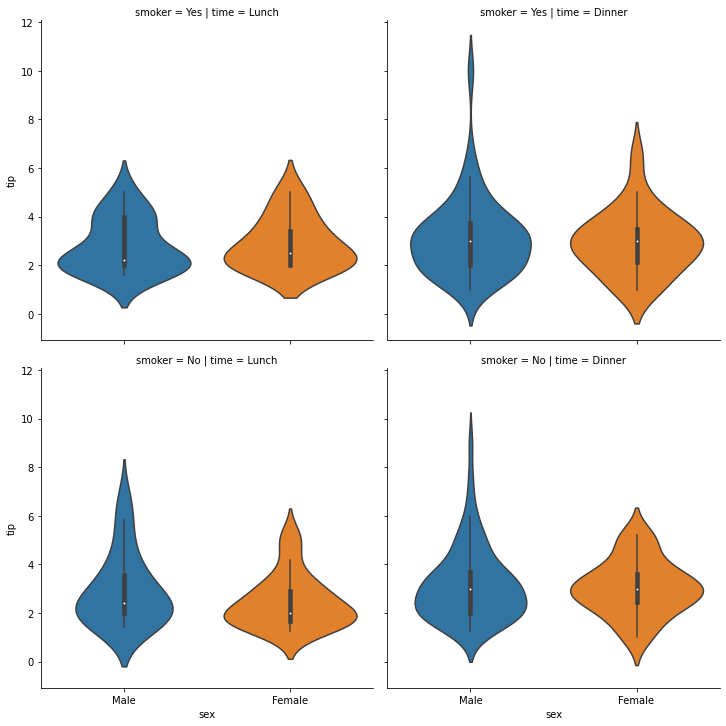

In [157]:
sns.catplot(data=tips, x='sex', y='tip', kind='violin', row='smoker', col='time');

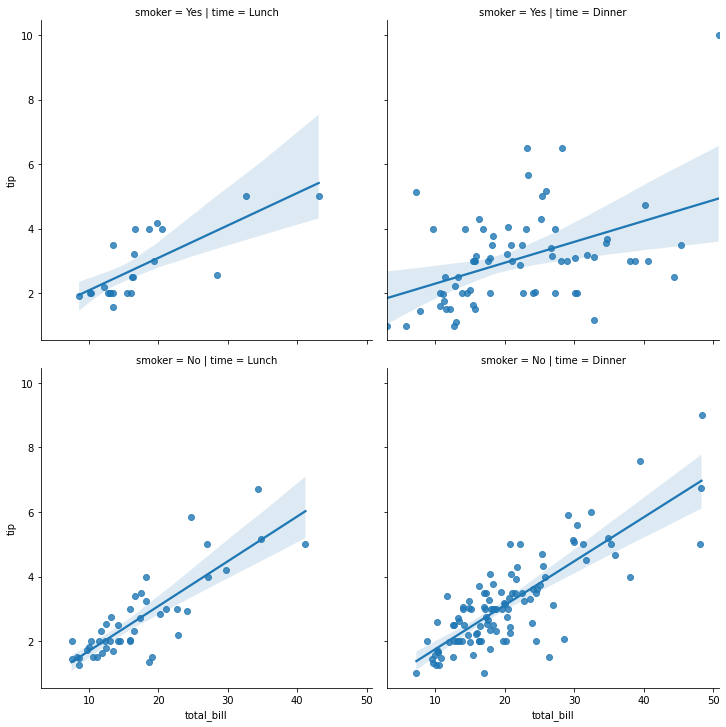

In [159]:
sns.lmplot(data=tips, x='total_bill', y='tip', row='smoker', col='time');

## 3. Plotly

In [168]:
import plotly 
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px

In [166]:
tesla = yf.download('TSLA', start='2018-01-01', end='2021-01-15')
tesla.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500


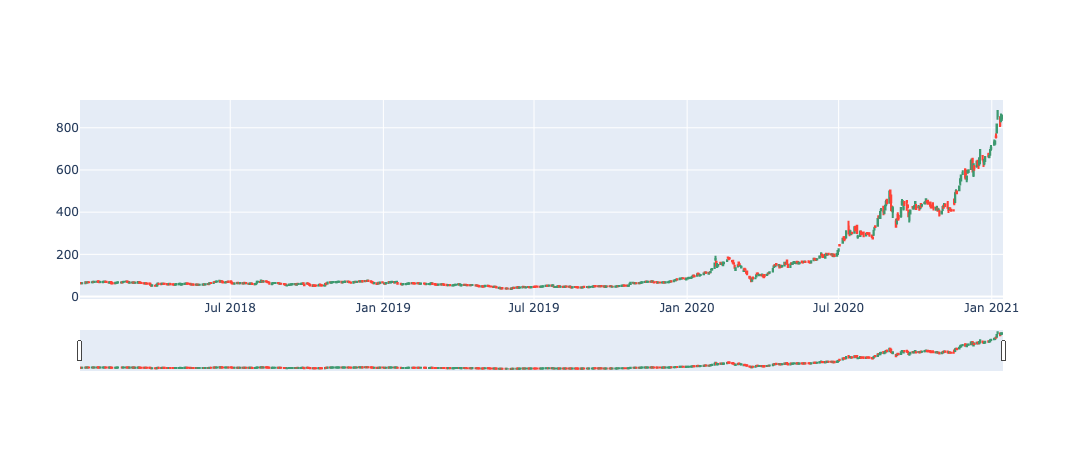

In [167]:
fig = go.Figure(data=[go.Candlestick(x=tesla.index,
                open=tesla.Open,
                high=tesla.High,
                low=tesla.Low,
                close=tesla.Close)])
fig.show()

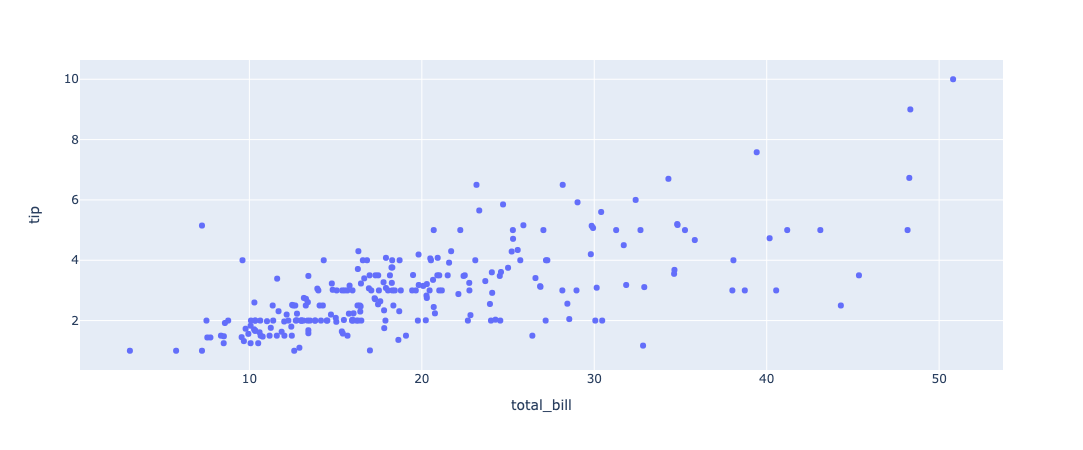

In [170]:
f = px.scatter(data_frame=tips, x='total_bill', y='tip')
f.show()

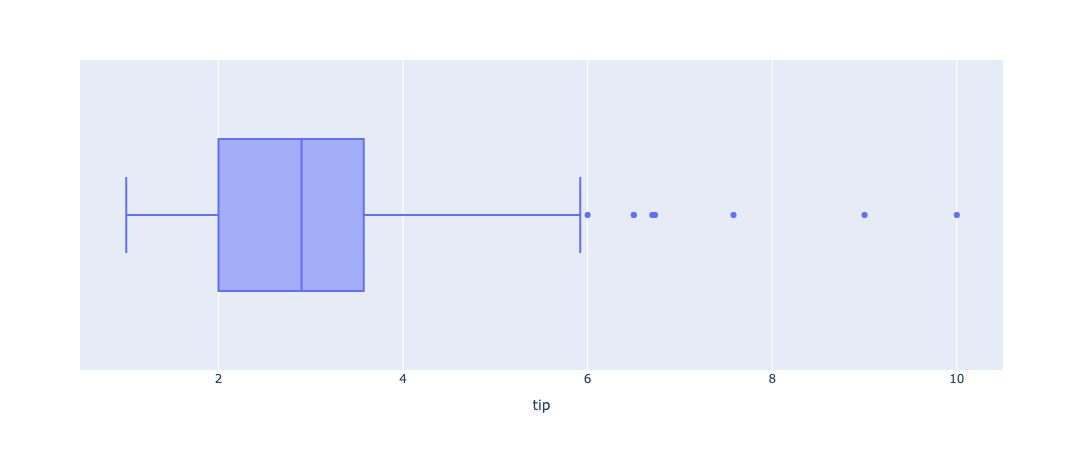

In [172]:
f = px.box(data_frame=tips, x='tip')
f.show()